In [3]:
from wordcloud import WordCloud
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from PIL import Image
import re

In [4]:
url = "https://media.naver.com/press/009/newspaper"
response = requests.get(url)
response.status_code

200

In [5]:
response.text

'<!doctype html>\n<html lang="ko">\n\t<head>\n\t\t<title id="browserTitleArea">\n\n\n\n\t\n\t\n\t\t매일경제 :: 네이버뉴스\n\t\n\n\n\n</title>\n\t\t\n\n\n<script>\n\tfunction isMobileDevice() {\n\t\treturn /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);\n\t}\n</script>\n<script>\n\t(function () {\n\t\ttry {\n\t\t\tif (isMobileDevice() && isAbleApplyPrefersColorScheme()) {\n\t\t\t\t\n\t\t\t\tdocument.querySelector("html").classList.add("DARK_THEME");\n\t\t\t}\n\t\t} catch(e) {}\n\n\t\tfunction isAbleApplyPrefersColorScheme() {\n\t\t\t\n\t\t\tif (window.matchMedia("(prefers-color-scheme)").matches === false) {\n\t\t\t\treturn false;\n\t\t\t}\n\n\t\t\tvar userAgent = navigator.userAgent;\n\n\t\t\tif (userAgent.indexOf("NAVER") > -1) {\n\t\t\t\t\n\t\t\t\tif (/.*NAVER\\([a-zA-Z]*;\\s[a-zA-Z]*;\\s([0-9]*);/.test(userAgent)) {\n\t\t\t\t\treturn Number(RegExp.$1) >= 1000;\n\t\t\t\t}\n\t\t\t} else {\n\t\t\t\t\n\t\t\t\treturn document.cookie.indexOf("NSCS=1") > -1;\n\t\t\t}\n\n\t\t\treturn fa

In [6]:
html = bs(response.text)


In [9]:
news = html.find("div",class_="_persist_wrap").find_all("a",class_="article_lst--title_only")

In [13]:
news

[<a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491072?date=20250513" onclick="nclk(event,'pap.alist','','');">
 <strong>[단독] LG, 트럼프發 관세 폭탄 대응 베트남 냉장고 생산 절반감축</strong>
 </a>,
 <a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491071?date=20250513" onclick="nclk(event,'pap.alist','','');">
 <strong>"사기 당한 내 전셋집이 월세로 나왔어요"</strong>
 </a>,
 <a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491070?date=20250513" onclick="nclk(event,'pap.alist','','');">
 <strong>美·中 상호관세 115%P씩 인하 전격 합의</strong>
 </a>,
 <a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491046?date=20250513" onclick="nclk(event,'pap.alist','','');">
 <strong>선물인가, 뇌물인가 … 카타르, 트럼프에 4억弗 보잉747 안겨</strong>
 </a>,
 <a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491043?date=20250513" onclick="nclk(event,'pap.alist','

In [156]:
news[0]

<a class="article_lst--title_only" href="https://n.news.naver.com/article/newspaper/009/0005491072?date=20250513" onclick="nclk(event,'pap.alist','','');">
<strong>[단독] LG, 트럼프發 관세 폭탄 대응 베트남 냉장고 생산 절반감축</strong>
</a>

In [37]:
news[0].text.replace('\n',"")

'[단독] LG, 트럼프發 관세 폭탄 대응 베트남 냉장고 생산 절반감축'

In [33]:
str(news[100]).split()[2].split('"')[1]

'https://n.news.naver.com/article/newspaper/009/0005490877?date=20250513'

In [45]:
lst = []
for n in news:
    # print(n.text.replace("\n", ""), str(n).split()[2].split('"')[1])
    lst.append([n.text.replace("\n", ""), str(n).split()[2].split('"')[1]])
lst

[['[단독] LG, 트럼프發 관세 폭탄 대응 베트남 냉장고 생산 절반감축',
  'https://n.news.naver.com/article/newspaper/009/0005491072?date=20250513'],
 ['"사기 당한 내 전셋집이 월세로 나왔어요"',
  'https://n.news.naver.com/article/newspaper/009/0005491071?date=20250513'],
 ['美·中 상호관세 115%P씩 인하 전격 합의',
  'https://n.news.naver.com/article/newspaper/009/0005491070?date=20250513'],
 ['선물인가, 뇌물인가 … 카타르, 트럼프에 4억弗 보잉747 안겨',
  'https://n.news.naver.com/article/newspaper/009/0005491046?date=20250513'],
 ["'신탁 전세사기'에 1200명 피눈물 등기부만 믿다가 눈뜨고 당했다",
  'https://n.news.naver.com/article/newspaper/009/0005491043?date=20250513'],
 ['美보세창고 보관료 60% 급등 수출 中企들 물류비에 악소리',
  'https://n.news.naver.com/article/newspaper/009/0005491035?date=20250513'],
 ['지자체에 법인세·최저임금 결정 권한 …"연금은 낸만큼 받게"',
  'https://n.news.naver.com/article/newspaper/009/0005491074?date=20250513'],
 ["재초환 폐지·종소세 물가연동제 金, 중도층 잡기 위해 '개발·감세'",
  'https://n.news.naver.com/article/newspaper/009/0005491075?date=20250513'],
 ["모든 재판 '대선後' 족쇄 풀린 이재명",
  'https://n.news.naver.com/article/newspa

In [46]:
len(lst)

105

In [48]:
lst[0][1]

'https://n.news.naver.com/article/newspaper/009/0005491072?date=20250513'

In [49]:
response = requests.get(lst[0][1])

In [51]:
response.status_code

200

In [54]:
content = bs(response.text)

In [68]:
content.find("article",id="dic_area").text.replace("\n","").replace("\t","")

'LG전자가 베트남 북부 하이퐁 소재 냉장고 생산설비의 가동률을 낮춰 생산량을 절반으로 줄인 것으로 12일 확인됐다.미국 도널드 트럼프 정부가 지난달 초 베트남산 제품에 대해 46%에 달하는 고율 관세를 부과했다가 90일간 이를 유예했지만, 만료 시점이 다가오자 리스크 관리 차원에서 생산량을 선제적으로 조정한 것이다. LG전자는 베트남 하이퐁, 멕시코 몬테레이, 인도 노이다·푸네 등에서 냉장고 생산라인을 운영하고 있다. 지난해 연간 생산 규모는 1100만대 이상인데, 이 중 80만~160만대가 하이퐁에서 생산된 것으로 추산된다. 지난달 미국 정부는 베트남산에 대해 46%의 관세를 부과했다. 가전 업계 관계자는 "관세 리스크가 해소되지 않아 생산거점을 일부 옮긴 것으로 보인다"며 "베트남 라인의 가동을 전면 중단한 것은 아니다"고 설명했다. LG전자는 스윙생산 체제의 일환으로 하이퐁 냉장고 생산라인의 가동률을 낮춰 미국향 냉장고 물량 일부를 줄이는 대신 멕시코 몬테레이 공장에서 생산하는 냉장고의 미국 시장 공급 비중을 늘려 대응한다는 방침이다.  [이상덕 기자]'

In [89]:
html = requests.get(lst[71][1])
content = bs(html.text.find("article", id="dic_area")
        .text.replace("\n", "")
        .replace("\t", ""))

TypeError: str.find() takes no keyword arguments

In [120]:
import time
contents = []
errors = []
count=1
total = len(lst)
for title, url in lst:
    html  = requests.get(url)
    if html.status_code==200:
        content = (
            bs(html.text)
            .find("article", id="dic_area")
            .text.replace("\n", "")
            .replace("\t", "")
        )
        contents.append(content)
        # time.sleep(1)
        print(f"{count}/{total} 완료")
        count +=1
    else:
        errors.append(count)

1/105 완료
2/105 완료
3/105 완료
4/105 완료
5/105 완료
6/105 완료
7/105 완료
8/105 완료
9/105 완료
10/105 완료
11/105 완료
12/105 완료
13/105 완료
14/105 완료
15/105 완료
16/105 완료
17/105 완료
18/105 완료
19/105 완료
20/105 완료
21/105 완료
22/105 완료
23/105 완료
24/105 완료
25/105 완료
26/105 완료
27/105 완료
28/105 완료
29/105 완료
30/105 완료
31/105 완료
32/105 완료
33/105 완료
34/105 완료
35/105 완료
36/105 완료
37/105 완료
38/105 완료
39/105 완료
40/105 완료
41/105 완료
42/105 완료
43/105 완료
44/105 완료
45/105 완료
46/105 완료
47/105 완료
48/105 완료
49/105 완료
50/105 완료
51/105 완료
52/105 완료
53/105 완료
54/105 완료
55/105 완료
56/105 완료
57/105 완료
58/105 완료
59/105 완료
60/105 완료
61/105 완료
62/105 완료
63/105 완료
64/105 완료
65/105 완료
66/105 완료
67/105 완료
68/105 완료
69/105 완료
70/105 완료
71/105 완료


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
contents2 = contents

In [94]:
contents2


['LG전자가 베트남 북부 하이퐁 소재 냉장고 생산설비의 가동률을 낮춰 생산량을 절반으로 줄인 것으로 12일 확인됐다.미국 도널드 트럼프 정부가 지난달 초 베트남산 제품에 대해 46%에 달하는 고율 관세를 부과했다가 90일간 이를 유예했지만, 만료 시점이 다가오자 리스크 관리 차원에서 생산량을 선제적으로 조정한 것이다. LG전자는 베트남 하이퐁, 멕시코 몬테레이, 인도 노이다·푸네 등에서 냉장고 생산라인을 운영하고 있다. 지난해 연간 생산 규모는 1100만대 이상인데, 이 중 80만~160만대가 하이퐁에서 생산된 것으로 추산된다. 지난달 미국 정부는 베트남산에 대해 46%의 관세를 부과했다. 가전 업계 관계자는 "관세 리스크가 해소되지 않아 생산거점을 일부 옮긴 것으로 보인다"며 "베트남 라인의 가동을 전면 중단한 것은 아니다"고 설명했다. LG전자는 스윙생산 체제의 일환으로 하이퐁 냉장고 생산라인의 가동률을 낮춰 미국향 냉장고 물량 일부를 줄이는 대신 멕시코 몬테레이 공장에서 생산하는 냉장고의 미국 시장 공급 비중을 늘려 대응한다는 방침이다.  [이상덕 기자]',
 '특별법 2년, 여전한 분노청년들 月 1천명씩 먹잇감피해구제 늦어지며 발 동동단기임대 온라인 플랫폼 \'삼삼엠투\' 등에 올라온 매물을 본 A씨(33)는 경악을 금치 못했다. 전세사기를 당한 자신의 주택이 \'풀옵션 하이엔드\' 매물로 올라와 있었기 때문이다. \'보증금 33만원에 1주당 26만원, 침대·온수매트·전자레인지·인덕션·옷장·신발장에 커튼까지 있으니 이불만 들고 오시면 됩니다\'란 안내문구와 함께 게재된 옵션 중 침대와 온수매트는 심지어 A씨 자신의 물건이었다.수원 일가족 전세사기 사건 피해자인 A씨는 아직 보증금 1억6000만원을 돌려받지 못했다. 그는 "거처를 신혼집으로 옮겼지만 사기를 당한 집은 임차권 등기를 마치고 점유를 위해 침대 등을 놔뒀다"고 했다. 하지만 그사이 자신의 집이 돌연 단기임대로 나온 것이다. 다시 찾은 A씨 집 앞에는 짐이 문밖에 나와 있고 \'20일까지 가져

In [97]:
from konlpy.tag import Okt

In [137]:
okt = Okt()
def okt_clean(text):
    clean_text = []
    okt_pos = okt.pos(text, stem=True)
    for txt, pos in okt_pos:
        if pos not in ["Josa", "Eomi", "Punctuation","Verb"]:
            if len(txt) != 1:
                clean_text.append(txt)
            
        
    return " ".join(clean_text)

In [138]:
clean_contents = okt_clean(" ".join(contents2))

In [139]:
clean_contents

'LG 전자 베트남 북부 하이퐁 소재 냉장고 생산 설비 가동 생산량 절반 12일 확인 미국 도널드 트럼프 정부 지난달 베트남 제품 대해 46% 관세 부과 90일 유예 만료 시점 리스크 관리 차원 생산량 선제 조정 LG 전자 베트남 하이퐁 멕시코 몬테레이 인도 푸네 냉장고 생산 라인 운영 있다 지난해 연간 생산 규모 1100만 이상 80만 160만 대가 하이퐁 생산 추산 지난달 미국 정부 베트남 대해 46% 관세 부과 가전 업계 관계자 관세 리스크 해소 생산 거점 일부 베트남 라인 가동 전면 중단 아니다 설명 LG 전자 스윙 생산 체제 일환 하이퐁 냉장고 생산 라인 가동 미국 냉장고 물량 일부 대신 멕시코 몬테레이 공장 생산 냉장고 미국 시장 공급 비중 대응 한다는 방침 이상덕 기자 특별법 2년 여전하다 분노 청년 1천 명씩 먹잇감 피해 구제 임대 온라인 플랫폼 엠투 매물 33 경악 금치 사기 당한 자신 주택 옵션 하이엔드 매물 있다 때문 보증금 33만원 26만원 침대 매트 전자레인지 인덕션 옷장 신발장 커튼 있다 이불 오시 안내 문구 함께 게재 옵션 침대 매트 심지어 자신 물건 수원 가족 전세 사기 사건 피해자 아직 보증금 1억 6000만원 거처 신혼집 사기 당한 임차권 등기 마치 점유 위해 침대 하지만 사이 자신 돌연 임대 다시 문밖 있다 20일 까지 처분 쪽지 있다 전세 사기 피해자 인정 1년 개월 한국 토지 주택 공사 LH 피해 주택 매입 신청 개월 구제 작업 지연 사이 단기 임대 시도 다음 달이 특별법 시행 2년 복기왕 민주당 의원 LH 자료 지난 4월 까지 전세 사기 피해자 사람 2만 9540 20~40 청년 2만 2152 전체 75% 차지 매달 1000 가깝다 청년 사기 먹잇감 특히 LH 매입 주택 398 75% 가량 피해자 인정 주택 매입 1년 이상 지혜 기자 서진우 기자 90일 적용 제네바 담판 중국산 30% 미국 10% 글로벌 증시 비트코인 급등 미국 중국 관세 전쟁 이후 진행 무역 협상 상호 관세 대폭 90일 유예 전격 합의 경제 대국 무역 

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = r"C:\Windows\Fonts\malgun.ttf"

# stopwords = [
#     "하지만",
#     "그리고",
#     "그런데",
#     "저는",
#     "제가",
#     "그럼",
#     "이런",
#     "저런",
#     "합니다",
#     "많은",
#     "많이",
#     "정말",
#     "너무",
#     "수",
#     "등",
#     "것",
#     "하다",
#     "되다",
#     "있다","으","기자","들","이"
# ]
stopwords = ["있다","이","것","등","들"]
def display_word_cloud(data, mask_img = None, width=1200, height=500):
    word_cloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        stopwords=stopwords,
        background_color="white",
        random_state=42,
        mask=mask_img,
    ).generate(data)

    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

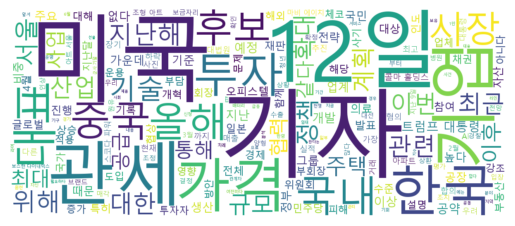

In [141]:
display_word_cloud(clean_contents)

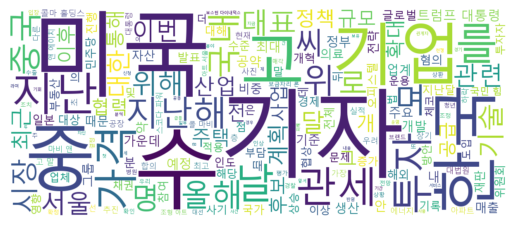

In [142]:
display_word_cloud(" ".join(okt.nouns(" ".join(contents2))))

In [153]:
import re
contents3 = clean_contents

contents4 = re.findall("[\w]{3,}", contents3)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_14080\1129333719.py:4: SyntaxWarning: invalid escape sequence '\w'
  contents4 = re.findall("[\w]{3,}", contents3)


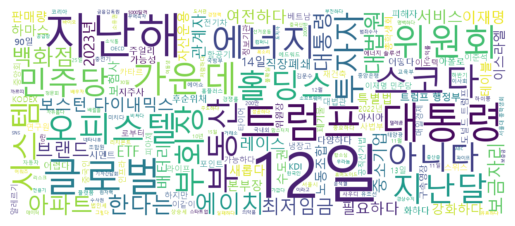

In [154]:
display_word_cloud(" ".join(contents4))